In [90]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

# Data importing and Cleaning

In [91]:
data = pd.read_csv('LifeExpectancyData.csv')
data.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Diphtheria,HIV/AIDS,GDP
0,Afghanistan,2015,65.0,263.0,62.0,0.01,71.279624,65.0,1154,19.1,6.0,65.0,0.1,584.259210
1,Afghanistan,2014,59.9,271.0,64.0,0.01,73.523582,62.0,492,18.6,58.0,62.0,0.1,612.696514
2,Afghanistan,2013,59.9,268.0,66.0,0.01,73.219243,64.0,430,18.1,62.0,64.0,0.1,631.744976
3,Afghanistan,2012,59.5,272.0,69.0,0.01,78.184215,67.0,2787,17.6,67.0,67.0,0.1,669.959000
4,Afghanistan,2011,59.2,275.0,71.0,0.01,7.097109,68.0,3013,17.2,68.0,68.0,0.1,63.537231


In [92]:
pd.isnull(data).sum()

Country                     0
Year                        0
Life expectancy            10
Adult Mortality            10
infant deaths               0
Alcohol                   194
percentage expenditure      0
Hepatitis B               553
Measles                     0
 BMI                       34
Polio                      19
Diphtheria                 19
 HIV/AIDS                   0
GDP                       448
dtype: int64

In [93]:
data.columns

Index(['Country', 'Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP'],
      dtype='object')

In [94]:
data = data.drop(['Country'], axis= 'columns')
data.head()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Diphtheria,HIV/AIDS,GDP
0,2015,65.0,263.0,62.0,0.01,71.279624,65.0,1154,19.1,6.0,65.0,0.1,584.259210
1,2014,59.9,271.0,64.0,0.01,73.523582,62.0,492,18.6,58.0,62.0,0.1,612.696514
2,2013,59.9,268.0,66.0,0.01,73.219243,64.0,430,18.1,62.0,64.0,0.1,631.744976
3,2012,59.5,272.0,69.0,0.01,78.184215,67.0,2787,17.6,67.0,67.0,0.1,669.959000
4,2011,59.2,275.0,71.0,0.01,7.097109,68.0,3013,17.2,68.0,68.0,0.1,63.537231


In [95]:
data.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP'],
      dtype='object')

In [96]:
le = data['Life expectancy ']
print(le)

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2938, dtype: float64


In [97]:

pd.isnull(data).sum()

Year                        0
Life expectancy            10
Adult Mortality            10
infant deaths               0
Alcohol                   194
percentage expenditure      0
Hepatitis B               553
Measles                     0
 BMI                       34
Polio                      19
Diphtheria                 19
 HIV/AIDS                   0
GDP                       448
dtype: int64

In [98]:
data['Life expectancy '] = data['Life expectancy '].fillna(np.mean(data['Life expectancy ']))
data['Adult Mortality'] = data['Adult Mortality'].fillna(np.mean(data['Adult Mortality']))
data['Alcohol'] = data['Alcohol'].fillna(np.mean(data['Alcohol']))
data['Hepatitis B'] = data['Hepatitis B'].fillna(np.mean(data['Hepatitis B']))
data[' BMI '] = data[' BMI '].fillna(np.mean(data[' BMI ']))
data['Polio'] = data['Polio'].fillna(np.mean(data['Polio']))
data['Diphtheria '] = data['Diphtheria '].fillna(np.mean(data['Diphtheria ']))
data['GDP'] = data['GDP'].fillna(np.mean(data['GDP']))


In [99]:
pd.isna(data).sum()

Year                      0
Life expectancy           0
Adult Mortality           0
infant deaths             0
Alcohol                   0
percentage expenditure    0
Hepatitis B               0
Measles                   0
 BMI                      0
Polio                     0
Diphtheria                0
 HIV/AIDS                 0
GDP                       0
dtype: int64

In [100]:
data.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Diphtheria,HIV/AIDS,GDP
0,2015,65.0,263.0,62.0,0.01,71.279624,65.0,1154,19.1,6.0,65.0,0.1,584.259210
1,2014,59.9,271.0,64.0,0.01,73.523582,62.0,492,18.6,58.0,62.0,0.1,612.696514
2,2013,59.9,268.0,66.0,0.01,73.219243,64.0,430,18.1,62.0,64.0,0.1,631.744976
3,2012,59.5,272.0,69.0,0.01,78.184215,67.0,2787,17.6,67.0,67.0,0.1,669.959000
4,2011,59.2,275.0,71.0,0.01,7.097109,68.0,3013,17.2,68.0,68.0,0.1,63.537231


In [101]:
independent_vars = data.drop(['Life expectancy '], axis = "columns")
independent_vars.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Diphtheria,HIV/AIDS,GDP
0,2015,263.0,62.0,0.01,71.279624,65.0,1154,19.1,6.0,65.0,0.1,584.259210
1,2014,271.0,64.0,0.01,73.523582,62.0,492,18.6,58.0,62.0,0.1,612.696514
2,2013,268.0,66.0,0.01,73.219243,64.0,430,18.1,62.0,64.0,0.1,631.744976
3,2012,272.0,69.0,0.01,78.184215,67.0,2787,17.6,67.0,67.0,0.1,669.959000
4,2011,275.0,71.0,0.01,7.097109,68.0,3013,17.2,68.0,68.0,0.1,63.537231


In [102]:
dependant_var = data['Life expectancy ']
dependant_var.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

In [103]:
x_train,x_test, y_train, y_test = train_test_split(independent_vars, dependant_var, train_size= 0.8)
x_train.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Diphtheria,HIV/AIDS,GDP
1468,2005,11.0,1.0,1.940000,630.054072,77.000000,618,6.8,74.0,77.0,0.1,5339.441291
2746,2015,75.0,1.0,4.602861,0.000000,99.000000,347,64.2,99.0,99.0,0.1,3911.746890
2117,2001,228.0,1.0,10.980000,0.000000,94.000000,457,46.8,98.0,97.0,0.1,7483.158469
2888,2001,138.0,32.0,1.840000,0.000000,80.940461,12058,9.6,96.0,96.0,0.1,7483.158469
2158,2008,282.0,18.0,6.390000,0.661540,97.000000,6,17.1,97.0,97.0,3.7,5.668726


In [104]:
y_train.head()

1468    73.9
2746    77.1
2117    67.6
2888    73.6
2158    68.0
Name: Life expectancy , dtype: float64

In [105]:
x_test.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Diphtheria,HIV/AIDS,GDP
752,2000,12.0,0.0,11.69,508.749691,80.940461,14,52.2,97.0,97.0,0.1,3743.559170
2620,2012,294.0,14.0,0.01,41.600280,84.000000,238,22.6,84.0,84.0,1.7,563.689425
1963,2011,121.0,1.0,6.90,119.212428,87.000000,4,54.9,91.0,87.0,0.1,927.723171
1793,2002,235.0,71.0,0.41,3.421881,80.940461,736,14.6,84.0,79.0,0.4,143.776510
76,2003,151.0,0.0,7.16,1158.065259,99.000000,0,4.1,99.0,99.0,0.1,9739.825560


In [106]:
y_test.head()

752     76.9
2620    58.9
1963    77.3
1793    62.8
76      74.2
Name: Life expectancy , dtype: float64

# Models to predict Life expectancy from Adult Mortality rate

In [107]:
dict = {
    'Adult Mortality' : data['Adult Mortality'],
    'Life expectancy ' : data['Life expectancy ']
    
}
single_feature_data = pd.DataFrame(dict)

In [108]:
single_feature_data.head()

,Adult Mortality,Life expectancy
0,263.0,65.0
1,271.0,59.9
2,268.0,59.9
3,272.0,59.5
4,275.0,59.2


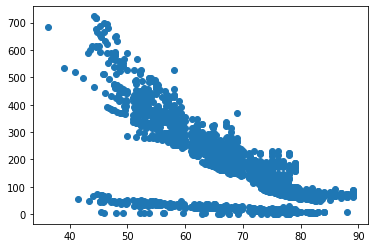

In [109]:
plt.scatter(single_feature_data['Life expectancy ' ],single_feature_data['Adult Mortality'])

In [110]:
X = single_feature_data.drop(['Life expectancy '], axis = 1)
Y= single_feature_data['Life expectancy ']

In [111]:
X_single_train, X_single_test, Y_single_train, Y_single_test = train_test_split(X,Y, train_size=0.8)

## single variable Linear Regression Model

In [112]:
single_Linear_model = LinearRegression()
single_Linear_model.fit(X_single_train,Y_single_train)

LinearRegression()

In [113]:
single_Linear_model.score(X_single_test, Y_single_test)

0.5049663737561463

In [114]:
rmse_single_Linear_train  =  np.sqrt(mean_squared_error(Y_single_train , single_Linear_model.predict(X_single_train)))
mae_single_Linear_train = mean_absolute_error(Y_single_train , single_Linear_model.predict(X_single_train))
print("root mean squared error : ", rmse_single_Linear_train)
print("mean absolute error : ", mae_single_Linear_train)

root mean squared error :  6.8284368161785896
mean absolute error :  4.783083377409303


In [115]:
rmse_single_Linear_test  =  np.sqrt(mean_squared_error(Y_single_test , single_Linear_model.predict(X_single_test)))
mae_single_Linear_test = mean_absolute_error(Y_single_test , single_Linear_model.predict(X_single_test))
print("root mean squared error : ", rmse_single_Linear_test)
print("mean absolute error : ", mae_single_Linear_test)

root mean squared error :  6.802369717044893
mean absolute error :  4.790948184448013


## single variable quadratic Linear Regression Model

In [116]:
poly2 = PolynomialFeatures(degree= 2, include_bias= False)
quadratic_single_features_train = poly2.fit_transform(X_single_train)
quadratic_single_features_train.shape

(2350, 2)

In [117]:
quadratic_single_features_test = poly2.fit_transform(X_single_test)

In [ ]:
single_quadratic_model = LinearRegression()
single_quadratic_model.fit(quadratic_single_features_train,Y_single_train)

In [ ]:
single_quadratic_model.score(quadratic_single_features_test, Y_single_test)

In [ ]:
rmse_single_quadratic_train  =  np.sqrt(mean_squared_error(Y_single_train , single_quadratic_model.predict(quadratic_single_features_train)))
mae_single_quadratic_train = mean_absolute_error(Y_single_train , single_quadratic_model.predict(quadratic_single_features_train))
print("root mean squared error : ", rmse_single_quadratic_train)
print("mean absolute error : ", mae_single_quadratic_train)

In [ ]:
rmse_single_quadratic_test  =  np.sqrt(mean_squared_error(Y_single_test , single_quadratic_model.predict(quadratic_single_features_test)))
mae_single_quadratic_test = mean_absolute_error(Y_single_test , single_quadratic_model.predict(quadratic_single_features_test))
print("root mean squared error : ", rmse_single_quadratic_test)
print("mean absolute error : ", mae_single_quadratic_test)

## single variable cubic Regression Model

In [ ]:
poly3 = PolynomialFeatures(degree= 3, include_bias= False)
cubic_single_features_test = poly3.fit_transform(X_single_test)
cubic_single_features_train = poly3.fit_transform(X_single_train)
cubic_single_features_train.shape

In [ ]:
single_cubic_model = LinearRegression()
single_cubic_model.fit(cubic_single_features_train,Y_single_train)

In [ ]:
single_cubic_model.score(cubic_single_features_test, Y_single_test)

In [ ]:
rmse_single_cubic_train  =  np.sqrt(mean_squared_error(Y_single_train , single_cubic_model.predict(cubic_single_features_train)))
mae_single_cubic_train = mean_absolute_error(Y_single_train , single_cubic_model.predict(cubic_single_features_train))
print("root mean squared error : ", rmse_single_cubic_train)
print("mean absolute error : ", mae_single_cubic_train)

In [ ]:
rmse_single_cubic_test  =  np.sqrt(mean_squared_error(Y_single_test , single_cubic_model.predict(cubic_single_features_test)))
mae_single_cubic_test = mean_absolute_error(Y_single_test , single_cubic_model.predict(cubic_single_features_test))
print("root mean squared error : ", rmse_single_cubic_test)
print("mean absolute error : ", mae_single_cubic_test)

## single variable biquadratic Regression Model

In [ ]:
poly4 = PolynomialFeatures(degree= 4, include_bias= False)
biquadratic_single_features_test = poly4.fit_transform(X_single_test)
biquadratic_single_features_train = poly4.fit_transform(X_single_train)
biquadratic_single_features_train.shape

In [ ]:
single_biquadratic_model = LinearRegression()
single_biquadratic_model.fit(biquadratic_single_features_train, Y_single_train)

In [ ]:
single_biquadratic_model.score(biquadratic_single_features_test, Y_single_test)

In [ ]:
rmse_single_biquadratic_train  =  np.sqrt(mean_squared_error(Y_single_train , single_biquadratic_model.predict(biquadratic_single_features_train)))
mae_single_biquadratic_train = mean_absolute_error(Y_single_train , single_biquadratic_model.predict(biquadratic_single_features_train))
print("root mean squared error : ", rmse_single_biquadratic_train)
print("mean absolute error : ", mae_single_biquadratic_train)

In [ ]:
rmse_single_biquadratic_test  =  np.sqrt(mean_squared_error(Y_single_test , single_biquadratic_model.predict(biquadratic_single_features_test)))
mae_single_biquadratic_test = mean_absolute_error(Y_single_test , single_biquadratic_model.predict(biquadratic_single_features_test))
print("root mean squared error : ", rmse_single_biquadratic_test)
print("mean absolute error : ", mae_single_biquadratic_test)

## single variable pentanomial Regression Model

In [ ]:
poly5 = PolynomialFeatures(degree= 5, include_bias= False)
pentanomial_single_features_test = poly5.fit_transform(X_single_test)
pentanomial_single_features_train = poly5.fit_transform(X_single_train)
pentanomial_single_features_train.shape

In [ ]:
single_pentanomial_model = LinearRegression()
single_pentanomial_model.fit(pentanomial_single_features_train, Y_single_train)

In [ ]:
single_pentanomial_model.score(pentanomial_single_features_test, Y_single_test)

In [ ]:
rmse_single_pentanomial_train  =  np.sqrt(mean_squared_error(Y_single_train , single_pentanomial_model.predict(pentanomial_single_features_train)))
mae_single_pentanomial_train = mean_absolute_error(Y_single_train , single_pentanomial_model.predict(pentanomial_single_features_train))
print("root mean squared error : ", rmse_single_pentanomial_train)
print("mean absolute error : ", mae_single_pentanomial_train)

In [ ]:
rmse_single_pentanomial_test  =  np.sqrt(mean_squared_error(Y_single_test , single_pentanomial_model.predict(pentanomial_single_features_test)))
mae_single_pentanomial_test = mean_absolute_error(Y_single_test , single_pentanomial_model.predict(pentanomial_single_features_test))
print("root mean squared error : ", rmse_single_pentanomial_test)
print("mean absolute error : ", mae_single_pentanomial_test)

## single variable hexanomial Regression Model

In [ ]:
poly6 = PolynomialFeatures(degree= 6, include_bias= False)
hexanomial_single_features_test = poly6.fit_transform(X_single_test)
hexanomial_single_features_train = poly6.fit_transform(X_single_train)
hexanomial_single_features_train.shape

In [ ]:
single_hexanomial_model = LinearRegression()
single_hexanomial_model.fit(hexanomial_single_features_train, Y_single_train)

In [ ]:
single_hexanomial_model.score(hexanomial_single_features_test, Y_single_test)

In [ ]:
rmse_single_hexanomial_train  =  np.sqrt(mean_squared_error(Y_single_train , single_hexanomial_model.predict(hexanomial_single_features_train)))
mae_single_hexanomial_train = mean_absolute_error(Y_single_train , single_hexanomial_model.predict(hexanomial_single_features_train))
print("root mean squared error : ", rmse_single_hexanomial_train)
print("mean absolute error : ", mae_single_hexanomial_train)

In [ ]:
rmse_single_hexanomial_test  =  np.sqrt(mean_squared_error(Y_single_test , single_hexanomial_model.predict(hexanomial_single_features_test)))
mae_single_hexanomial_test = mean_absolute_error(Y_single_test , single_hexanomial_model.predict(hexanomial_single_features_test))
print("root mean squared error : ", rmse_single_hexanomial_test)
print("mean absolute error : ", mae_single_hexanomial_test)

## single variable heptanomial Regression Model

In [ ]:
poly7 = PolynomialFeatures(degree= 7, include_bias= False)
heptanomial_single_features_test = poly7.fit_transform(X_single_test)
heptanomial_single_features_train = poly7.fit_transform(X_single_train)
heptanomial_single_features_train.shape

In [ ]:
single_heptanomial_model = LinearRegression()
single_heptanomial_model.fit(heptanomial_single_features_train, Y_single_train)

In [ ]:
single_heptanomial_model.score(heptanomial_single_features_test, Y_single_test)

In [ ]:
rmse_single_heptanomial_train  =  np.sqrt(mean_squared_error(Y_single_train , single_heptanomial_model.predict(heptanomial_single_features_train)))
mae_single_heptanomial_train = mean_absolute_error(Y_single_train , single_heptanomial_model.predict(heptanomial_single_features_train))
print("root mean squared error : ", rmse_single_heptanomial_train)
print("mean absolute error : ", mae_single_heptanomial_train)

In [ ]:
rmse_single_heptanomial_test  =  np.sqrt(mean_squared_error(Y_single_test , single_heptanomial_model.predict(heptanomial_single_features_test)))
mae_single_heptanomial_test = mean_absolute_error(Y_single_test , single_heptanomial_model.predict(heptanomial_single_features_test))
print("root mean squared error : ", rmse_single_heptanomial_test)
print("mean absolute error : ", mae_single_heptanomial_test)

# Models to predict LE with all the avilable features

## Linear regression model

In [ ]:
model_Linear = LinearRegression()
model_Linear.fit(x_train, y_train)

In [ ]:
model_Linear.score(x_test, y_test)

In [ ]:
rmse_Linear_train  =  np.sqrt(mean_squared_error(y_train , model_Linear.predict(x_train)))
mae_Linear_train = mean_absolute_error(y_train , model_Linear.predict(x_train))
print("root mean squared error : ", rmse_Linear_train)
print("mean absolute error : ", mae_Linear_train)

In [ ]:
rmse_Linear_test  =  np.sqrt(mean_squared_error(y_test , model_Linear.predict(x_test)))
mae_Linear_test = mean_absolute_error(y_test , model_Linear.predict(x_test))
print("root mean squared error : ", rmse_Linear_test)
print("mean absolute error : ", mae_Linear_test)


In [ ]:
model_Linear.coef_

## Quadratic Regression Model

In [ ]:
poly2 = PolynomialFeatures(degree= 2, include_bias= False)
quadeatic_features_train = poly2.fit_transform(x_train)

In [ ]:
x_train.shape

In [ ]:
quadeatic_features_train.shape

In [ ]:
quadeatic_features_test = poly2.fit_transform(x_test)

In [ ]:
model_Quadratic = LinearRegression()
model_Quadratic.fit(quadeatic_features_train, y_train)

In [ ]:
model_Quadratic.score(quadeatic_features_test, y_test)

In [ ]:
rmse_Quadratic_train  =  np.sqrt(mean_squared_error(y_train , model_Quadratic.predict(quadeatic_features_train)))
mae_Quadratic_train = mean_absolute_error(y_train , model_Quadratic.predict(quadeatic_features_train))
print("root mean squared error : ", rmse_Quadratic_train)
print("mean absolute error : ", mae_Quadratic_train)

In [ ]:
rmse_Quadratic_test  =  np.sqrt(mean_squared_error(y_test , model_Quadratic.predict(quadeatic_features_test)))
mae_Quadratic_test = mean_absolute_error(y_test , model_Quadratic.predict(quadeatic_features_test))
print("root mean squared error : ", rmse_Quadratic_test)
print("mean absolute error : ", mae_Quadratic_test)

## Cubic Regression Model

In [ ]:
poly3 = PolynomialFeatures(degree= 3, include_bias= False)
cubic_features_train = poly3.fit_transform(x_train)

In [ ]:
x_train.shape

In [ ]:
cubic_features_train.shape

In [ ]:
cubic_features_test = poly3.fit_transform(x_test)

In [ ]:
cubic_features_test.shape

In [ ]:
model_Cubic = LinearRegression()
model_Cubic.fit(cubic_features_train, y_train)

In [ ]:
model_Cubic.score(cubic_features_test, y_test)

In [ ]:
rmse_Cubic_train  =  np.sqrt(mean_squared_error(y_train , model_Cubic.predict(cubic_features_train)))
mae_Cubic_train = mean_absolute_error(y_train , model_Cubic.predict(cubic_features_train))
print("root mean squared error : ", rmse_Cubic_train)
print("mean absolute error : ", mae_Cubic_train)

In [ ]:
rmse_Cubic_test  =  np.sqrt(mean_squared_error(y_test , model_Cubic.predict(cubic_features_test)))
mae_Cubic_test = mean_absolute_error(y_test , model_Cubic.predict(cubic_features_test))
print("root mean squared error : ", rmse_Cubic_test)
print("mean absolute error : ", mae_Cubic_test)

#### we observed a drastic drop in score from Quadratic to Linear So we will stop the increase in degree here as the model suffer from overfitting

## Using PCA on over fitted Cubic regression model to observe the change.

In [ ]:
pca = PCA(n_components=40)
cubic_features_train_pca = pca.fit_transform(cubic_features_train)
cubic_features_test_pca = pca.fit_transform(cubic_features_test)

In [ ]:
cubic_features_train_pca.shape

In [ ]:
model_Cubic_pca = LinearRegression()
model_Cubic_pca.fit(cubic_features_train_pca, y_train)

In [ ]:
model_Cubic_pca.score(cubic_features_test_pca, y_test)

#### that didnt work out well so we can tell that the PCA decomposition cant solve overfitting.

## Biquadratic Regression Model

In [ ]:
poly4 = PolynomialFeatures(degree= 4, include_bias= False)
biquadratic_features_train = poly4.fit_transform(x_train)
biquadratic_features_train.shape

In [ ]:
biquadratic_features_test = poly4.fit_transform(x_test)
biquadratic_features_test.shape

In [ ]:
model_Biquadratic = LinearRegression()
model_Biquadratic.fit(biquadratic_features_train, y_train)

In [ ]:
model_Biquadratic.score(biquadratic_features_test, y_test)

# Analysis of Performance of different models

## For single variable regression

In [ ]:
Degrees_of_regression = [1, 2, 3,4,5,6,7]
Train_errors = [rmse_single_Linear_train, rmse_single_quadratic_train, rmse_single_cubic_train, rmse_single_biquadratic_train, rmse_single_pentanomial_train, rmse_single_hexanomial_train, rmse_single_heptanomial_train]
Test_errors = [rmse_single_Linear_test, rmse_single_quadratic_test, rmse_single_cubic_test, rmse_single_biquadratic_test, rmse_single_pentanomial_test, rmse_single_hexanomial_test, rmse_single_heptanomial_test]
plt.plot(Degrees_of_regression,Train_errors, label = "TrainErrors")
plt.plot(Degrees_of_regression,Test_errors, label = "TestErrors")
plt.legend()
plt.scatter(Degrees_of_regression,Train_errors)
plt.scatter(Degrees_of_regression,Test_errors)
print(Train_errors)
plt.xlabel("Degree of regression")
plt.ylabel("RMSE")

#### by analysing the errors the hexanomial regression is best for this single variable regression

## For multivariable regression

In [ ]:
Degrees_of_regression = [1, 2, 3]
Train_errors = [rmse_Linear_train, rmse_Quadratic_train, rmse_Cubic_train]
Test_errors = [rmse_Linear_test, rmse_Quadratic_test, rmse_Cubic_test]
print(Train_errors)
plt.plot(Degrees_of_regression,Train_errors, label = "TrainErrors")
plt.plot(Degrees_of_regression,Test_errors, label = "TestErrors")
plt.legend()
plt.scatter(Degrees_of_regression,Train_errors)
plt.scatter(Degrees_of_regression,Test_errors)
plt.xlabel("Degree of regression")
plt.ylabel("RMSE")


#### after a regression of degree 2 the model shows the problem of overfitting. So we can conclude that the quadratic regression will be the best model for the given regression scenario